   ## L'évolution du terrorisme mondial depuis 1970

 

In [ ]:
#pip install descartes 
#pip install geopandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import descartes
import geopandas as gpd
from shapely.geometry import Point

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import fonction_carte1 as fc1
import GlobalTerrorismAnalysis as gta
import ModelingRegression as mr



   Le prix Nobel d'économie Joseph E. Stiglitz déclare, en 2001, dans son ouvrage  _Quand le capitalisme perd la tête_ que « le 11 septembre a révélé une face encore plus sombre de la mondialisation. Le terrorisme aussi franchit aisément les frontières ». D’après lui, l’ouverture des frontières n’aurait donc pas seulement profité aux marchandises et aux flux migratoires touristiques et de travailleurs mais aurait également profité aux groupes terroristes. Le climat actuel en France nous pousserait à être en accord avec son raisonnement, seulement il est important de se fonder sur des données chiffrées fiables avant de conclure quoi que ce soit.
Pour cela nous allons analyser une base données recensant les attaques terroristes dans le monde de 1970 à 2017, ainsi que leur lieu, le nombre de victimes, de blessés, les cibles et bien d’autres précisions sur l’attaque.
Mais avant tout, il convient de définir le terrorisme ainsi que d’en retracer brièvement son histoire. L’ONU, en 2004, définit le terrorisme comme « toute action [...] qui a pour intention de causer la mort ou de graves blessures corporelles à des civils ou à des non-combattants, lorsque le but d'un tel acte est, de par sa nature ou son contexte, d'intimider une population, ou de forcer un gouvernement ou une organisation internationale à prendre une quelconque mesure ou à s'en abstenir ».  Cependant nous allons utiliser une définition un peu plus courte mais qui correspond à celle de notre base de données. Le terrorisme va donc être « la menace ou l’utilisation réelle de la force et de la violence illégale par un acteur non étatique pour atteindre un objectif politique, économique, religieux ou un objectif social par la peur ou l’intimidation ». Le terrorisme comme on vient de le définir commence réellement en Irlande avec en 1858 la naissance du groupe « Fraternité Républicaine Irlandaise » qui agit contre le gouvernement britannique, et qui fusionnera des années plus tard avec le groupe d’indépendantiste irlandais plus connu, l’IRA. Le terrorisme peut donc comme nous venons de le voir en Irlande avoir des raisons politiques, mais les raisons peuvent également être religieuses, ou ethniques. En France, depuis quelques années le terrorisme semble animé essentiellement par des extrémistes « islamistes » donnant des justifications religieuses à leurs actions visant non pas le gouvernement directement mais plutôt des civils comme lors du triste 13 novembre 2015.
Grâce à notre base de données nous allons pouvoir analyser l’évolution du terrorisme depuis 1970 à 2017 et donc voir si le climat anxiogène qui règne en France (et dans le monde) depuis quelques années est effectivement lié à un plus grand nombre d’attaques ou si la surmédiatisation des évènements en est la cause. En outre, nous allons analyser l'évolution du terrorisme sur cette période en nous concentrant sur des axes tels que le nombre d'attaques, de victimes, les méthodes employées, les cibles visées ainsi que les acteurs. La fiabilité des données (que nous présenterons ci-dessous) et les événements actuels nous ont poussé à nous intéresser à ce sujet.

    Ainsi, comment a évolué le terrorisme dans le monde de 1970 à 2017 ?

   Afin de répondre à cette problématique, nous allons donc utiliser le logiciel Python qui nous permettra de traiter nos données et de les présenter.


Pour mener à bien notre réflexion, nous présenterons tout d’abord notre base de données puis nous analyserons l'évolution du terrorisme et enfin on essaiera de faire des prévisions de succès ou d'échecs d'attaques.

## I - Présentation des données


   La base de données que nous avons utilisée se nomme Global terrorism Database (GTD), et correspond à la base de données non classée secrète la plus complète sur les attaques terroristes dans le monde.
La GTD est une base de données open source qui fournit des informations sur les attaques terroristes nationales et internationales dans le monde de 1970 à 2017 et comprend plus de 180 000 attaques.
   Pour chaque événement, une large gamme d’informations sont renseignées, dont les dates, les localisations, les armes utilisées, la nature de la cible, le nombre de blessés, de mort ou encore le groupe ou individu responsable quand il est identifiable. 
La base de données a été faite et est maintenu par les chercheurs de la National Consortium for the Study of Terrorism and Responses to Terrorism (START) à l’Université du Maryland.

   Il a tout d'abord fallu nettoyer les données afin que celles-ci soient plus lisibles et interprétables. Pour cela, nous utilisons la fonction cleandata() du module GlobalTerrorismAnalysis, qui retire du dataframe les colonnes qui ne nous intéressent pas pour notre analyse, ainsi que les colonnes qui ont trop de valeurs manquantes. Pour les colonnes restantes, la fonction retire les lignes qui ont au moins une valeur manquante.

In [3]:
#Entrer en argument de la fonction le chemin du fichier de la base de données

dff=gta.cleandata(chemin_du_fichier)



eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


Nous avons ainsi retiré près de 45 000 observations, cependant, nous disposons encore de largement assez d'observations pour étudier et analyser les tendances et l'évolution du terrorisme ces 50 dernières années. Dans la suite nous aurons besoin d'autres colonnes, que nous ajoutons à l'aide de la fonction newcol(), également présente dans le module GlobalTerrorismAnalysis. Celle-ci crée une colonne "ncasualties", égale au nombre de victimes par attaque (blessés + morts), ainsi qu'une colonne "totalcasualties" qui est un compteur du nombre de victimes. Nous ajoutons également les pétiodes (décennies) pour chaque attaque. 

In [4]:
#Fonction qui ajoute les colonnes ncasualties et totalcasualties :
gta.newcol(dff)

#Pour avoir les périodes :
dff["period"]=0
dff["period"]=dff["iyear"].apply(gta.periodes)  

#On affiche le dataframe final
print(dff)

        iyear  imonth  iday  extended  country    country_txt  region  \
5        1970       1     1         0      217  United States       1   
6        1970       1     2         0      218        Uruguay       3   
7        1970       1     2         0      217  United States       1   
8        1970       1     2         0      217  United States       1   
9        1970       1     3         0      217  United States       1   
...       ...     ...   ...       ...      ...            ...     ...   
181685   2017      12    31         0        4    Afghanistan       6   
181686   2017      12    31         0      182        Somalia      11   
181687   2017      12    31         0      200          Syria      10   
181688   2017      12    31         0      160    Philippines       5   
181689   2017      12    31         0       92          India       6   

                        region_txt           city   latitude  ...  weaptype1  \
5                    North America         

Maintenant que nous disposons du dataframe final, voici la présentation de chacune des colonnes :

iday : jour de l'attaque

iyear : année de l'attaque

imonth : mois de l'attaque

extended : si l'attaque a duré plus que 24 heures (0 = non, 1 = oui)

country : identifiant du pays où l'attaque s'est déroulée

country_txt : nom du pays où s'est déroulée l'attaque

region : identifiant de la région

region_txt : nom de la région dans laquelle s'est déroulée l'attaque

city : ville où s'est déroulée l'attaque

latitude : latitude du lieu de l'attaque

longitude : longitude du lieu de l'attaque 

crit1 : vaut 1 si l'attaque visait à atteindre un but politique, social, économique ou religieux, 0 sinon (pas une attaque à visée personnelle)

crit2 : vaut 1 si l'attaque visait à intimider une audience plus large que les victimes touchées, 0 sinon

crit3 : vaut 1 si l'attaque a eu lieu en dehors d'un contexte de guerre (les victimes ne sont pas des combattants), 0 sinon

multiple : est ce que l'attaque est liée à une autre ? (0 = non, 1 = oui)

success : si le(s) terroriste(s) a atteint son(leur) but(s) (0 = non, 1 = oui)

suicide : si l'attaque était une attaque suicide (0 = non, 1 = oui)

attacktype1_txt : méthode d'attaque principale

targtype1 : identifiant du principal type de la cible

targtype1_txt : principal type de la cible

targsubtype1 : identifiant principal du sous-type de la cible

targsubtype1_txt : sous-type principal de la cible

target1 : cible principale

natlty1 : identifiant de la nationalité principale de la cible

natlty1_txt : nationalité principale de la cible

gname : groupe du(des) terroriste(s)

guncertain1 : si le groupe du terroriste est confirmé (0 = non, 1 = oui)

weaptype1 : identifiant du principal type d'arme utilisée

weaptype1_txt : principal type d'arme utilisée 

weapsubtype1 : identifiant du sous-type de l'arme utilisée

weapsubtype1_txt : sous-type de l'arme utilisée

nkill : nombre de personnes tuées pendant l'attaque

nwound : nombre de personnes blessées pendant l'attaque

ishostkid : est ce que les victimes ont été prise en hotage ? (0 = non, 1 = oui)

ncasualties : nombre de victimes (personnes tuées et blessées)

totalcasualties : somme totale des victimes au moment donné

period : décennie durant laquelle l'attaque s'est déroulée



   Pour commencer il peut être intéressant d’avoir une vue d’ensemble sur les attaques terroristes dans le monde de 1970 à 2017. On peut voir que certains sont beaucoup moins touchés que d’autres, comme le Canada ou l’Australie par rapport à des pays comme les États-Unis, la Colombie ou les pays du Moyen-Orient sur la carte suivante :

/Users/utilisateur/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


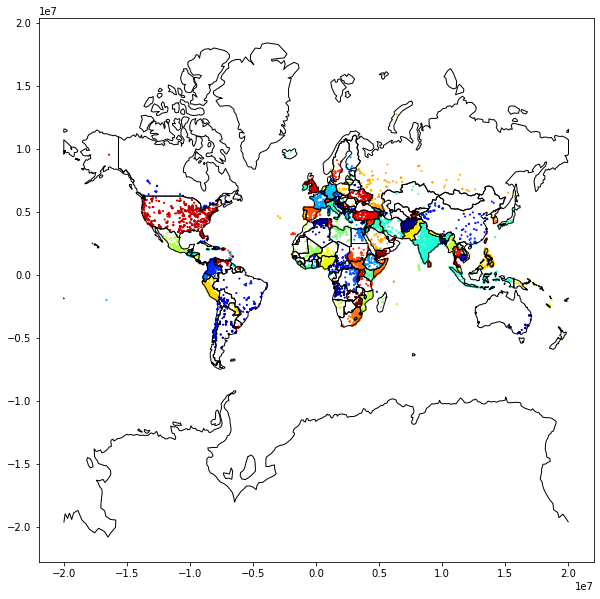

In [8]:
fc1.carte(dff)


   Débutons à présent l'analyse descriptive de nos données. 

In [ ]:
f=dff.describe()
print(f)

   Nous disposons de beaucoup de données qualitatives, nous pouvons donc interpréter peu d'éléments à l'aide de la fonction describe(). Le pays où les attaques sont les plus réccurentes est l'Iraq (à Baghdad), et la région la plus attaquée est le Moyen Orient - Afrique du Nord. L'attaque la plus meurtrière a fait 1180 morts, et la moyenne de victimes (blessés + morts) est située est 5 et 6 personnes. Sur les 134332 attaques dont nous disposons, il y a eu au total 738249 victimes. Pour analyser plus en profondeur et mieux décrire nos données, nous disposons de plusieurs fonctions dans le module GlobalTerrorismAnalysis. Commençons avec les acteurs principaux.

In [19]:
#Les 10 groupes terroristes les plus actifs :
print("Les 10 groupes terroristes les plus actifs sont :\n",dff["gname"].value_counts()[:15])

Les 10 groupes terroristes les plus actifs sont :
 Unknown                                             65687
Taliban                                              5407
Islamic State of Iraq and the Levant (ISIL)          3823
Shining Path (SL)                                    3283
Farabundo Marti National Liberation Front (FMLN)     2076
Al-Shabaab                                           2027
New People's Army (NPA)                              2020
Kurdistan Workers' Party (PKK)                       1731
Revolutionary Armed Forces of Colombia (FARC)        1695
Communist Party of India - Maoist (CPI-Maoist)       1562
Boko Haram                                           1561
Basque Fatherland and Freedom (ETA)                  1559
Irish Republican Army (IRA)                          1303
Liberation Tigers of Tamil Eelam (LTTE)              1285
Maoists                                              1263
Name: gname, dtype: int64


Nous pouvons donc observer que majoritairement ce sont des attentats non revendiqués (ce qui reste rare pour des groupes actuels comme l'EI - ISIL ici) où des actions réalisées par des individus "isolés", c'est-à-dire non directement rattachés à des groupes terroristes connus. 
On pourrait par exemple citer les massacres perpétrés dans des écoles par des adolescents aux Etats-Unis, alors des attaques de suprémacistes blancs comme en Norvège en 2011 ou récemment en Nouvelle-Zélande. On observe cependant que ce sont des groupes comme l'EI (ISIL) qui réalisent les attaques les plus meurtrières. 

/Users/utilisateur/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


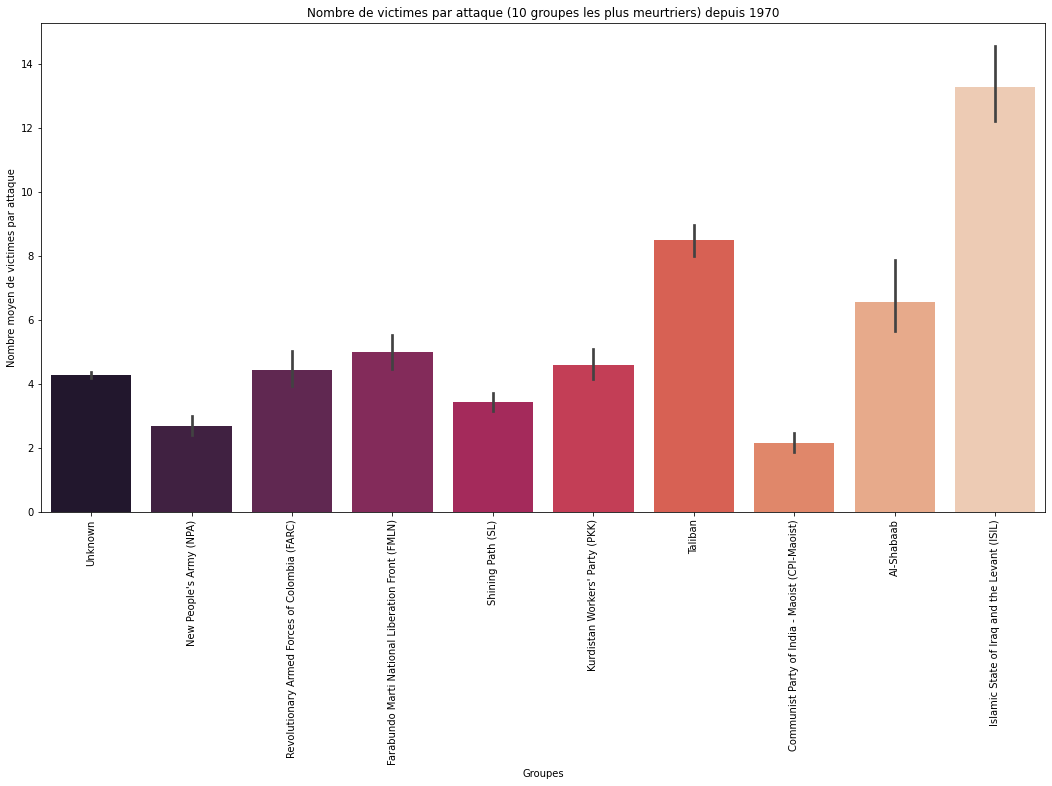

In [15]:
gta.descdatagroupterr(dff)

Mais dans quels pays ces attaques sont concentrées ?

In [20]:
#Les 25 pays les plus attaqués :
print("Les 25 pays les plus attaqués sont :\n", dff["country_txt"].value_counts()[:25]) 

Les 25 pays les plus attaqués sont :
 Iraq                        20724
Pakistan                    11984
India                        9544
Afghanistan                  9486
Colombia                     5734
Philippines                  5385
Peru                         4397
Turkey                       3367
Thailand                     3308
El Salvador                  3027
United Kingdom               2770
Somalia                      2655
Nigeria                      2592
Spain                        2423
Yemen                        2332
Sri Lanka                    2299
United States                2206
Egypt                        2029
Russia                       1912
France                       1910
Lebanon                      1842
West Bank and Gaza Strip     1778
Algeria                      1775
Chile                        1631
Israel                       1616
Name: country_txt, dtype: int64


Conformément à notre supposition du début les pays du Moyen-Orient sont présents, ainsi que la Colombie et les États-Unis.
La France figure à la 20ème place de ce classement.

Cependant on peut se demander si les cibles sont les mêmes dans chaque pays ?
 
En effet on pourrait légitimement se dire que dans les dictatures ou pays en guerre les cibles serraient plutôt des forces de l’ordre alors que dans les pays démocratiques ce serait plus des civils.
Cependant, on observe que les cibles sont globalement les mêmes dans chaque région du monde. En effet, la police, les militaires ainsi que les civils correspondent aux mêmes proportions par rapport au nombre total d’attaques dans toutes les régions du monde.

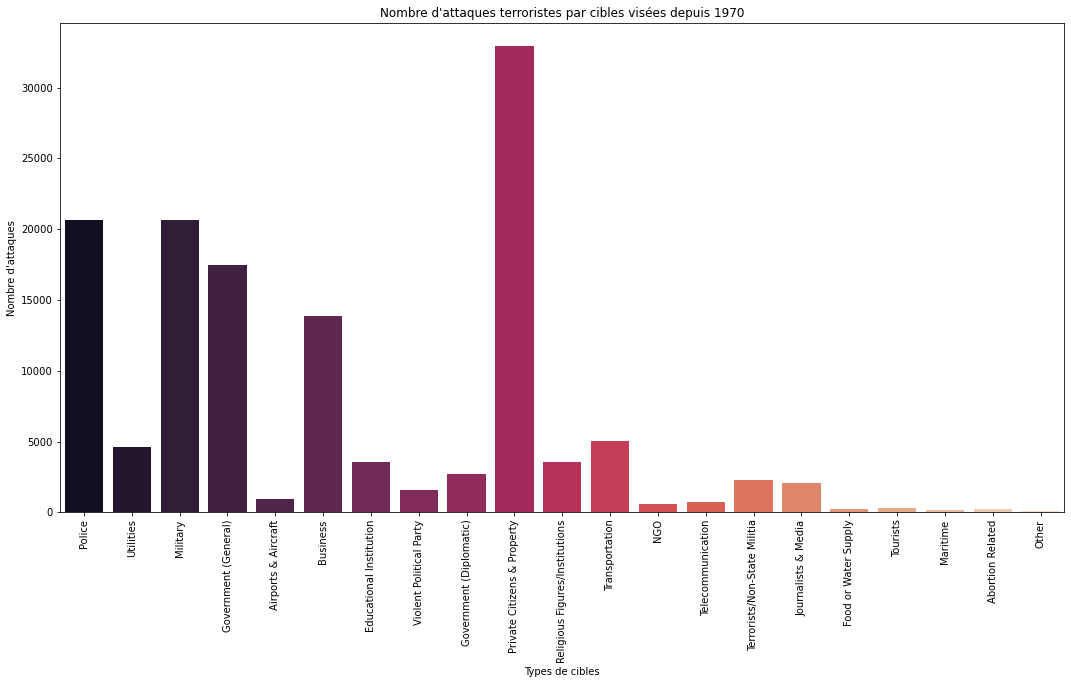

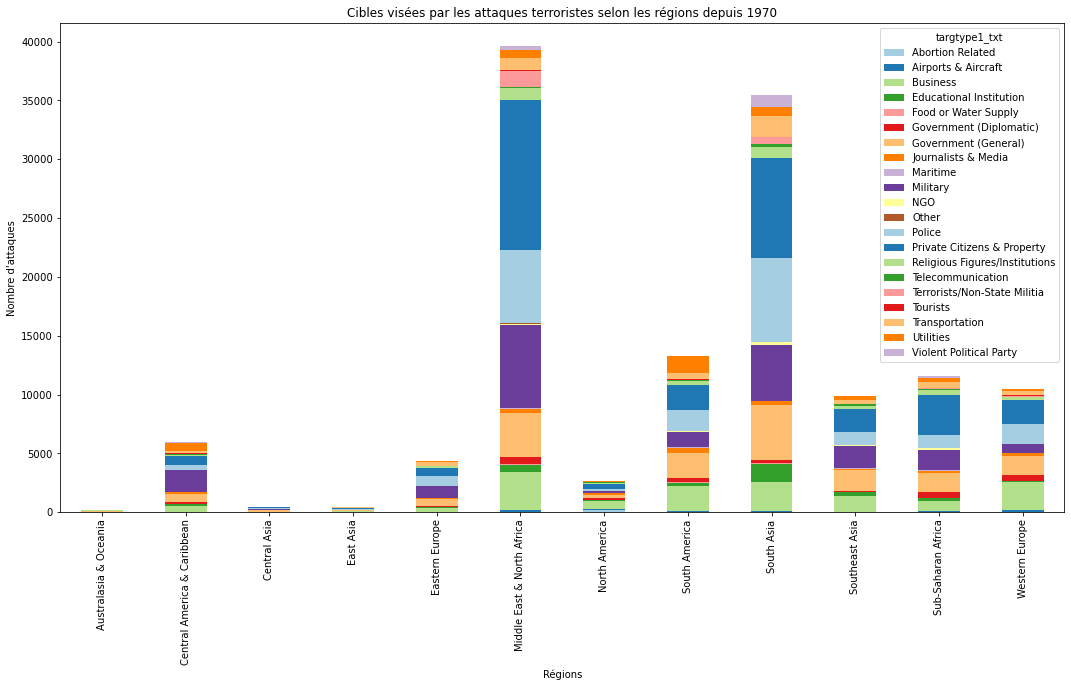

In [10]:
gta.descdatatarg(dff)

Ensuite il peut être intéressant de voir les méthodes les plus utilisées et leur « efficacité », en effet cela pourrait potentiellement servir aux gouvernements à prendre des mesures plus adaptées dans la lutte anti-terroriste. Les explosifs sont de loin le moyen privilégié par les terroristes, suivi par les armes à feu. Cependant, si les prises d’otages sont peu employées, elles constituent la méthode qui fait le plus de victimes par attaque comme on le voit ci-dessous :

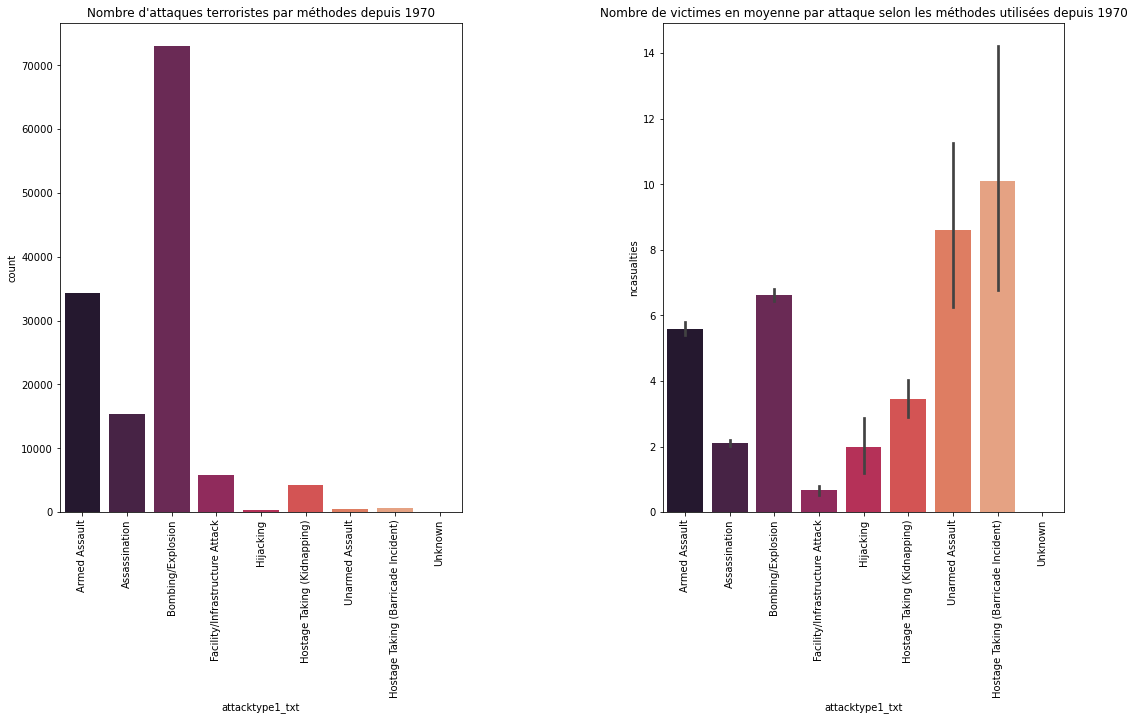

In [11]:
gta.descdatameth(dff)

## II - Analyse de l'évolution du terrorisme depuis 1970

Intéressons nous tout d'abord au nombre d'attaques par année. On observe directement une tendance à la hausse entre 1970 et 1992. Pendant cette période, le terrorisme est surtout employé dans un contexte de Guerre Froide, par des groupes d'extrême gauche cherchant à déstabiliser les Etats occidentaux pour réveiller les consciences et tenter de mener une Révolution (on peut citer certains groupes comme les Brigades Rouges, la RAF – Fraction Armée Rouge – ou encore Action Directe. Le terrorisme vise également Israël et les pays occidentaux qui le soutiennent, notamment depuis la guerre des Six Jours (1967), dans le cadre de la lutte pro-palestinienne. Ces deux mouvements se rejoignent dans un même but : lutter contre l’Occident. Certains groupes pro-palestiniens se sont associés à des groupes d’extrêmes gauches dans le cadre de certaines attaques (octobre 1977 par exemple lorsque la bande à Baader s’associe au FPLP pour détourner un avion). 
Cependant, on observe une tendance à la baisse dans les 1990s et jusqu’en 1998 environ : après la chute de l’URSS, le communisme décline donc de moins en moins d’attaques sont commises par des groupes communistes. Les groupes luttant contre Isräel et ses alliés sont toujours actifs, cependant, on observe l’émergence de nouveaux groupes terroristes : les groupes islamistes, qui vont également lutter contre les pays occidentaux. On peut par exemple citer Al-Qaïda (fondée en 1987 mais le groupe devient très actif à partir de 1997) et toutes ses ramifications (comme AQMI). Dans les années 2000, les groupes terroristes se multiplient, multipliant également les attaques comme on le voit clairement sur le graphique, et notamment depuis 2003/2004 après l’intervention des Etats-Unis en Irak. 


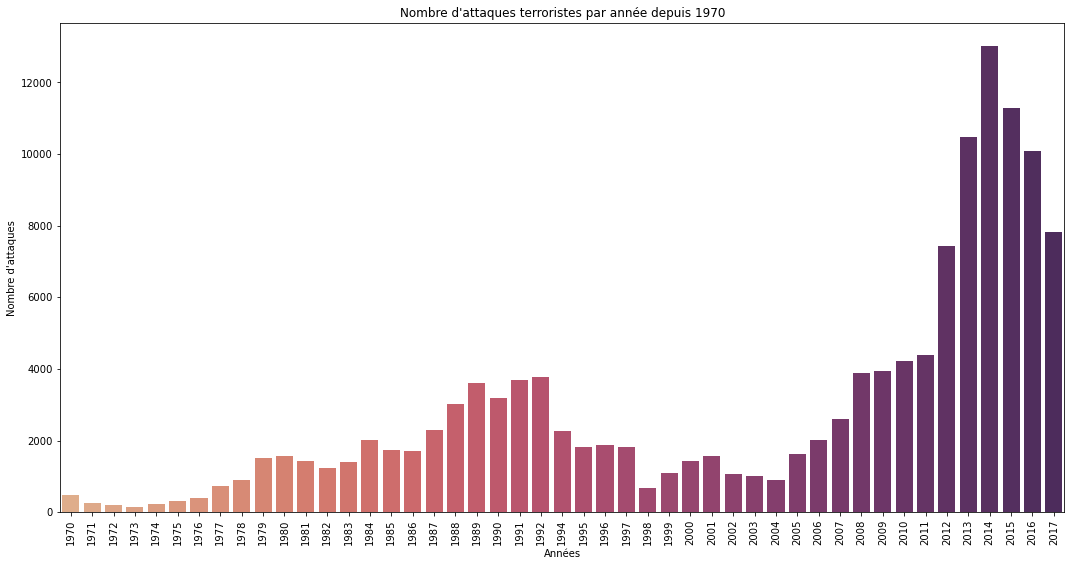

In [13]:
gta.evolatk(dff)

Qu'en est-il de l'évolution du nombre de victimes par rapport au nombre d'attaques ?
Sur le graphique précédent, on observe qu'il y avait moins d'attaques dans les années 2000, mais des attaques qui faisaient beaucoup plus de victimes (second graphique), avec des pics très élevés comme l'attaque de l'ambassade américaine au Kenya en 1998, ou les attentats de Madrid en 2004. Notons que l'on n'observe pas de pic en 2001 car la ligne a été supprimée à cause de valeurs manquantes. 
En revanche dans les années 2010 il y avait beaucoup plus d'attaques (graphique précédent) mais moins de victimes par attaque.
Le nombre d’attaques a donc beaucoup augmenté depuis 1970, passant 2000 en 1980 à un peu plus de 12 000 en 2015, cependant le nombre de victimes par attaque est passé d’en moyenne 3 sur la période 1970-1975 à 5 sur la période 2012-2017, quand, sur les mêmes périodes, le nombre total de victimes est passé de 6000 en 1980 à plus de 60 000 en 2015. 

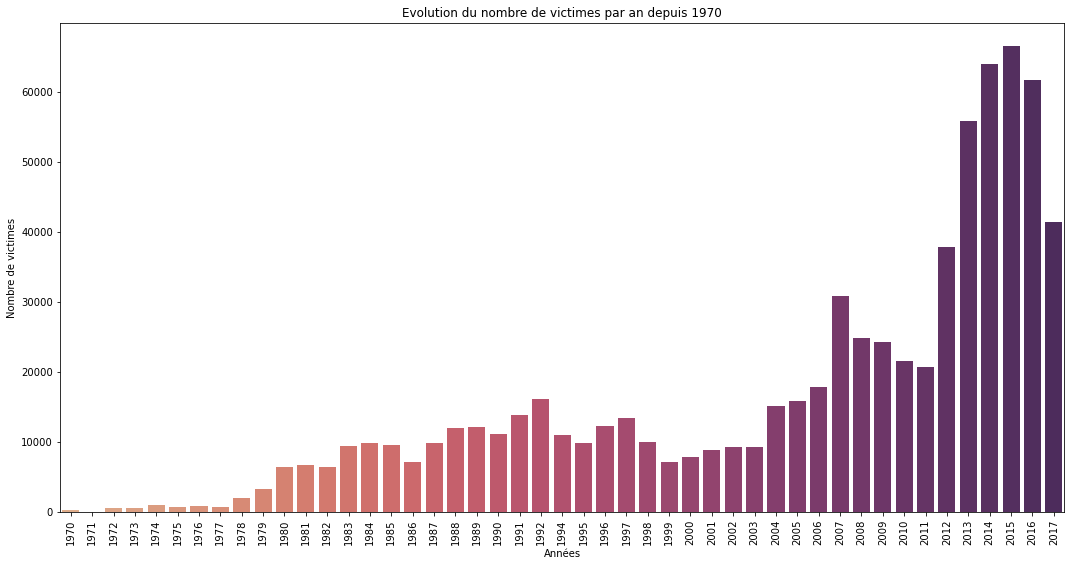

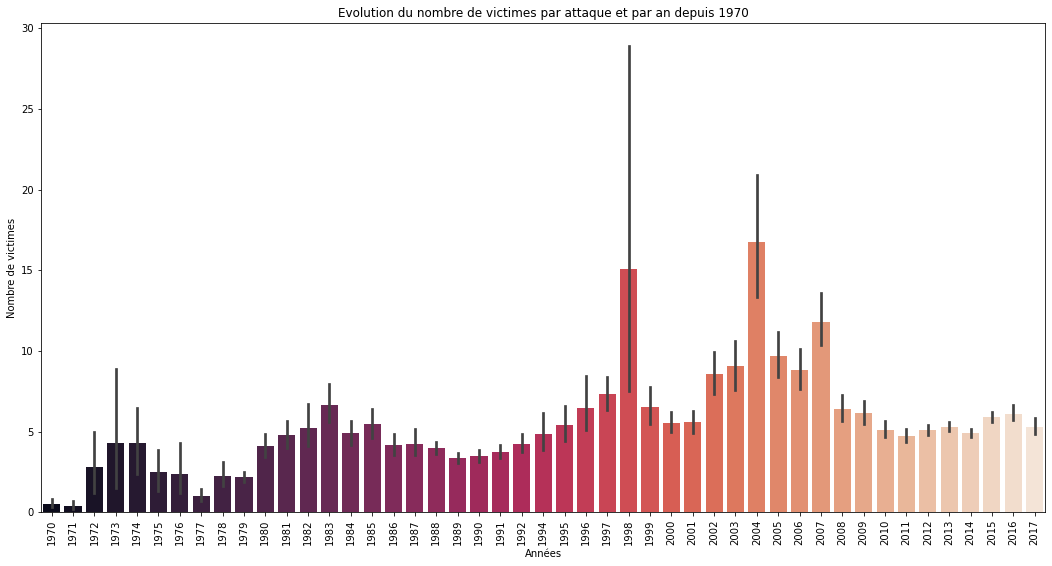

In [12]:
gta.evolcasyear(dff)

En affinant l'analyse, et en s'intéressant à l'évolution du nombre d'attaques selon les régions, on constate qu'il y a bien une explosion du nombre d’attaques dans les 2010s (et un peu 2000s) au Moyen-Orient et Afrique du Nord, Asie du Sud et du Sud Est, Afrique Subsaharienne, par contre pas du tout en Océanie, Amérique du Sud, Asie du Centre et de l’Est. En effet, en Amérique du Sud et Centrale, il y avait surtout des attaques terroristes dans les 1980s pour lutter contre les régimes militaires. Ceux-ci ayant (pour la plupart) pris fin dans les 1990s et 2000s, on voit bien que le nombre d’attaques est fortement réduit par la suite. Pour ce qui est du Moyen-Orient et de l'Afrique du Nord, en plus des explications que nous avons déjà fourni, nous pouvons ajouter que les années 2010 ont vu une explosion du nombre d’attaques terroristes par exemple en raison du printemps arabe fin 2010 puis la mort de Mouammar Kdhafi en octobre 2011, ce qui a entrainé de fortes instabilités en Afrique du Nord. 

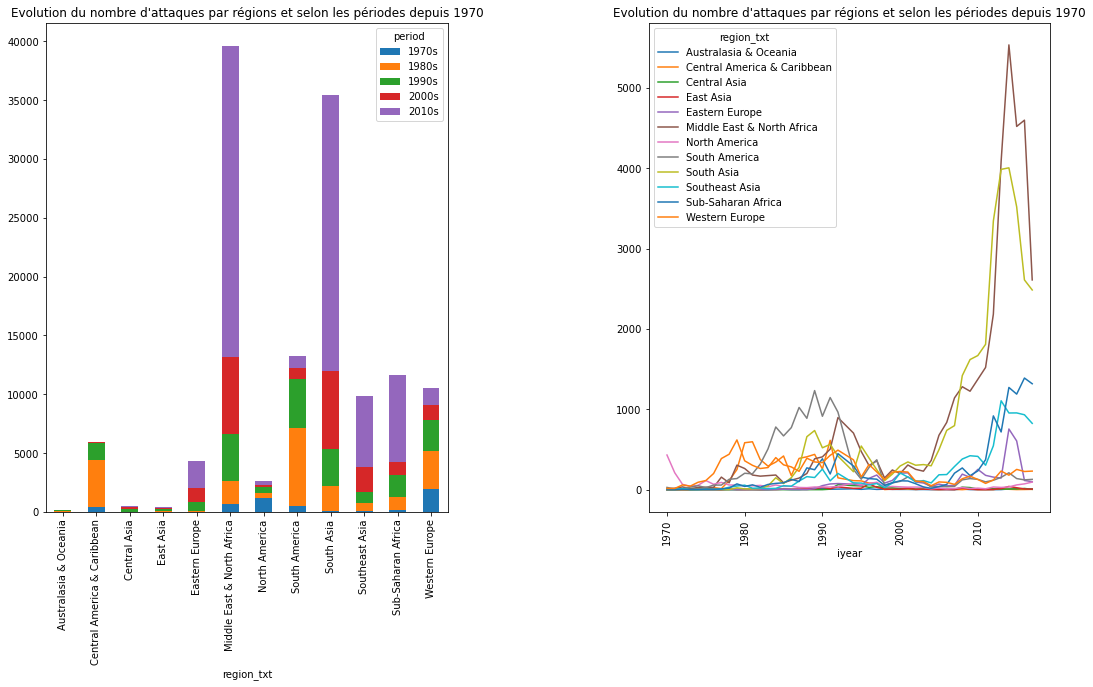

In [21]:
gta.evolatkreg(dff)

On peut également analyser l'évolution de l'activité des différents groupes les plus actifs sur toute la période. Les individus isolés (ou attaques non revendiquées) ont toujours été le premier groupe en termes de nombre d’attaques réalisées, mais on observe que ce phénomène prend de plus en plus d’ampleur depuis 2005. On pourrait alors considérer que ces individus comme les plus dangereux. 

En retirant les individus isolés de l'analyse (graphique 2), on voit bien que les groupes formés plus récemment (Talibans, EI) sont les groupes qui ont fait le plus d’attaques toutes périodes confondues en très peu de temps.


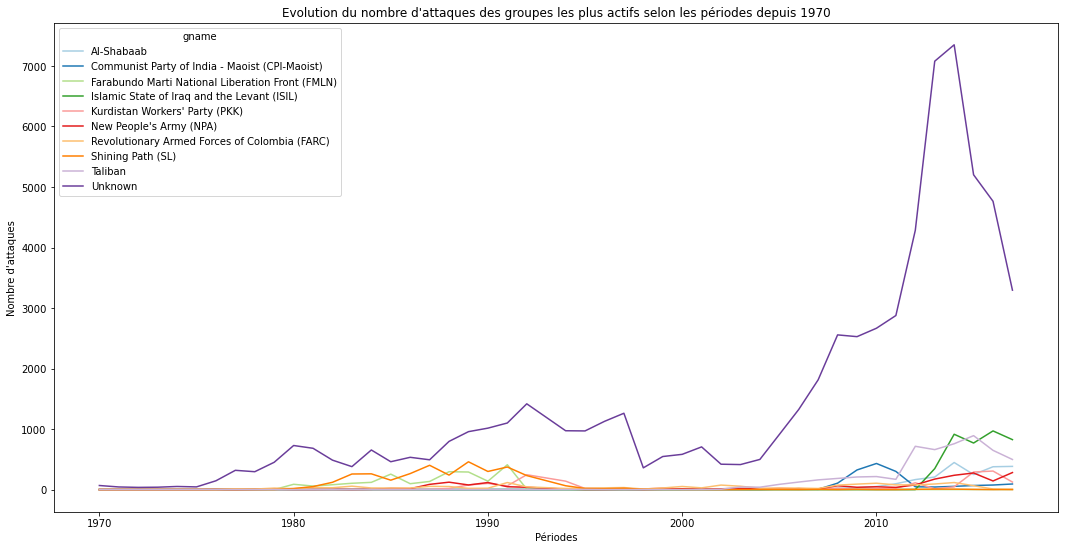

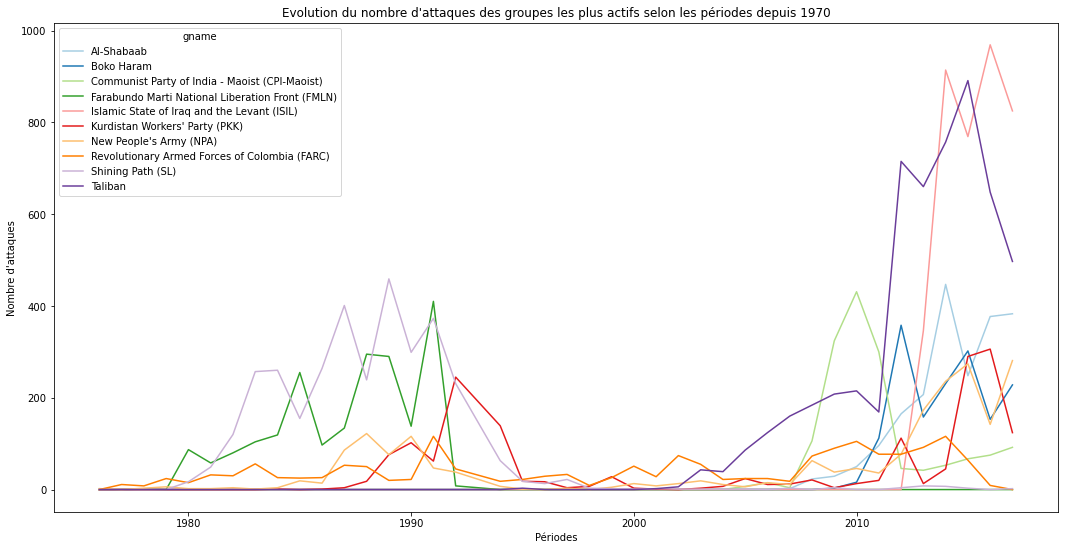

In [15]:
gta.evolgroup(dff)

Etudions ensuite l'évolution des cibles visées par les attaques.
Les civils ont toujours été les cibles privilégiées, avec les militaires et la police sauf dans les 1970s, où les entreprises étaient les plus visées avec le gouvernement. Dans les 1980s, les entreprises et les gouvernements sont également très attaqués, cependant les attaques cibles également de plus en plus les citoyens, militaires et policiers. Comme nous avons pu l’aborder précédemment, durant les 1970s et 1980s, des groupes d’extrême gauche cherchait à déstabiliser les Etats occidentaux afin de lutter contre le capitalisme. On peut ainsi expliquer le fait que les entreprises étaient les plus visées. Aujourd’hui, ce sont surtout des groupes islamistes qui sont actifs, et qui s’attaquent en particulier aux citoyens, à la police et aux militaires, ainsi qu’aux gouvernements. 
On peut donc dire que le nombre d’attaques qui a augmenté s’est essentiellement concentré sur les civils.


/Users/utilisateur/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


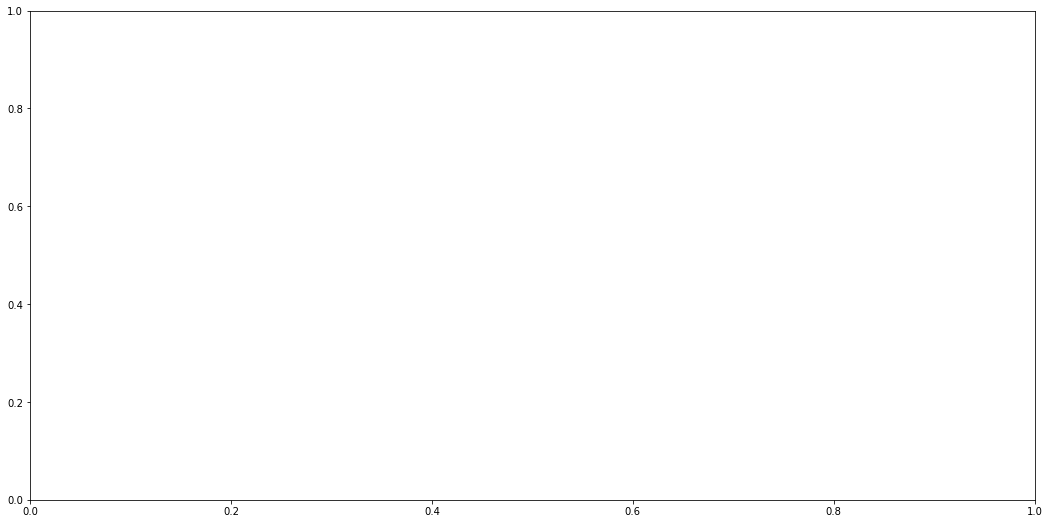

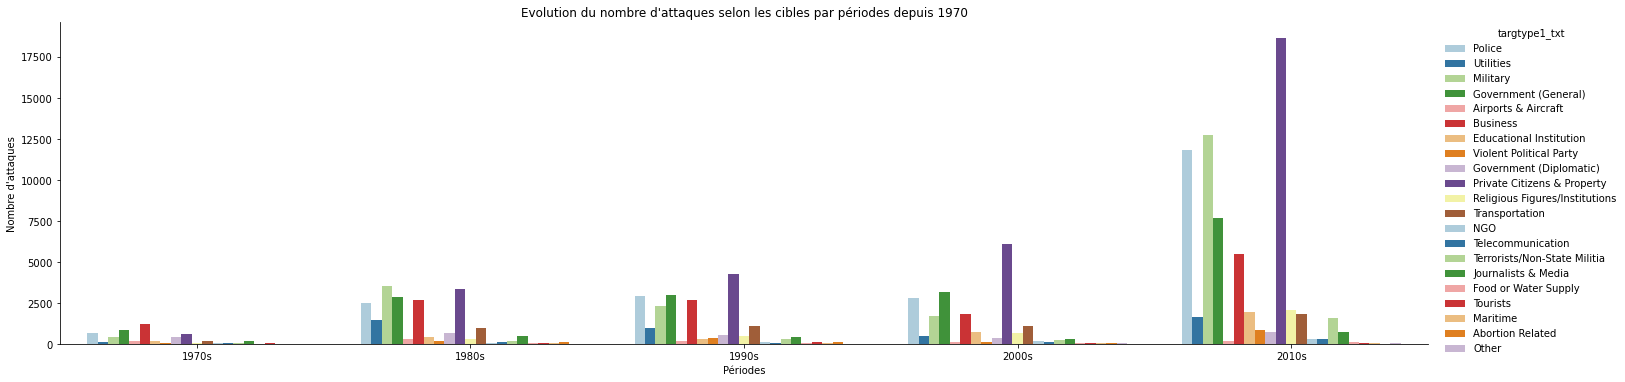

In [28]:
gta.evoltarg(dff) #un graphique blanc parasite apparaît

Enfin, intéressons nous à l'évolution des méthodes utilisées. L’arme privilégiée par les terroristes depuis 1970s sont les explosifs. Les attaques à l’explosif (attaques à la bombes, kamikazes…), ont connu une très forte hausse entre les 2000s et 2010s, alors que le nombre d’attaques par explosifs semblait rester constant entre 1980 et les 2000s. Les attaques par armes à feu ont également connu une très forte expansion : celles-ci sont en effet faciles à obtenir (plus facile qu’auparavant), et donc sont très utilisées, notamment par des individus isolés (comme des attaques récentes de suprémacistes blancs par exemple ou encore les fusillades dans les lycées aux Etats-Unis). Enfin, les prises d’otages semblent être de plus en plus utilisées par les terroristes depuis quelques années, ainsi que les attaques dirigées vers les infrastructures, même si cela reste encore marginal.

/Users/utilisateur/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


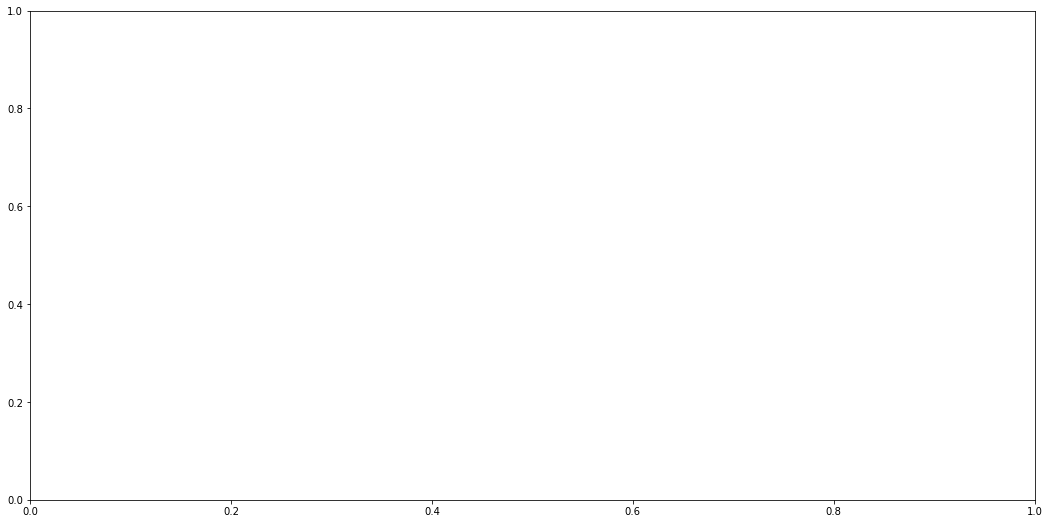

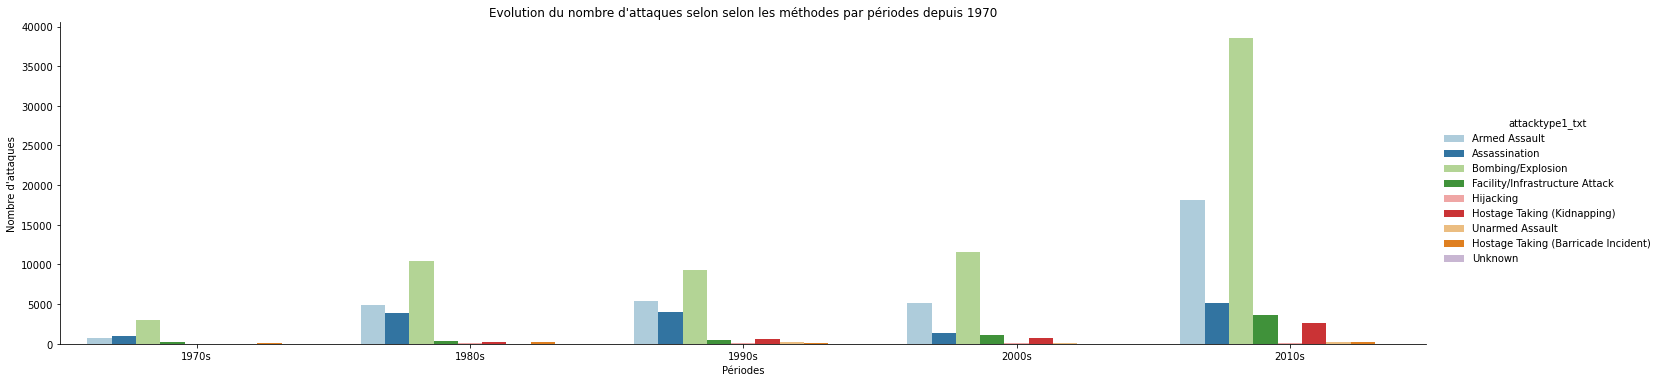

In [16]:
gta.evolmeth(dff) #un graphique blanc parasite apparaît

Par ailleurs, si l'on veut affiner l'analyse et s'intéresser de plus près à l'évolution d'un groupe, d'une méthode, d'une cible, d'une région ou encore d'un pays souhaité, nous disposons d'autres fonctions dans le module GlobalTerrorismAnalysis. Par exemple, si cherche l'évolution du nombre total d'attaques en France :

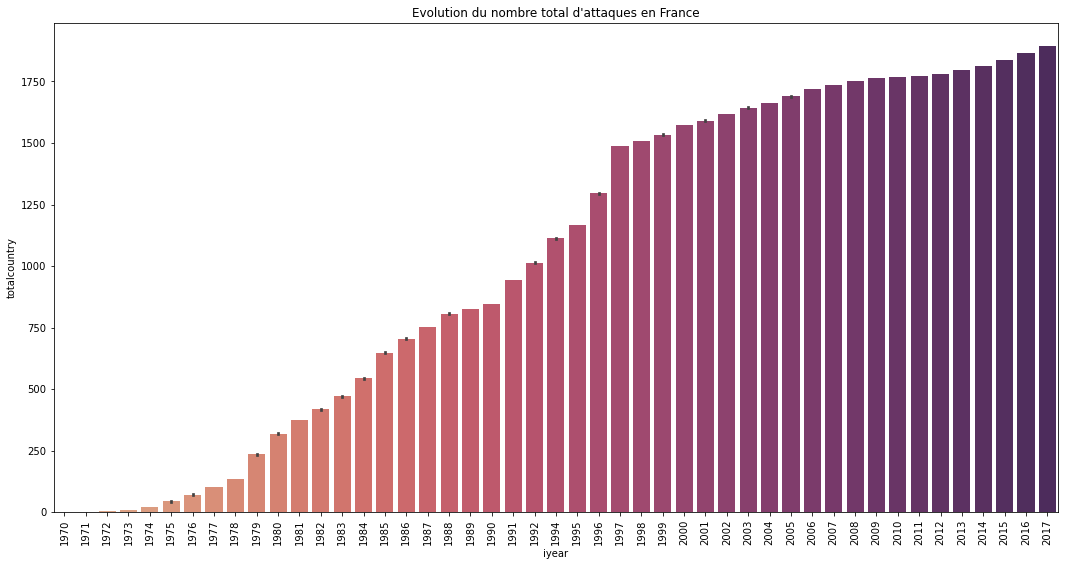

In [21]:
gta.totalcountry(dff,'France')

De manière similaire, si on s'intéresse à l'évolution du nombre total d'attaques par armes à feu depuis 1970, on obtient le graphique suivant. On observe bien que le nombre d'attaques par armes à feu augmente plus rapidement depuis une dizaine d'années.

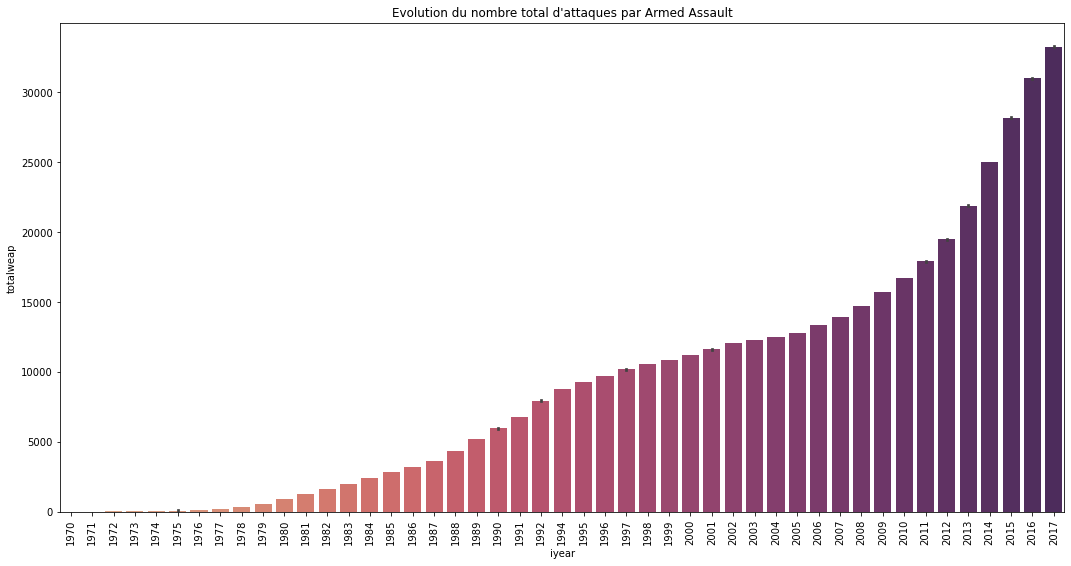

In [23]:
gta.totalweap(dff, 'Armed Assault')

## III - Prolongement et modèles de prévision



Après avoir passé en revue la présentation de nos données et l'analyse de l'évolution du terrorisme depuis 1970, on va maintenant nous interesser à un exercice très particulier qui est la prédiction. Au cours de ce qui suit, on va essayer de prédire le succès et l'échec d'un attentat. Pour ce faire on va utiliser 2 modèles, on va d'abord faire une régression linéaire et puis un random forest. 

Mais avant tout, interessons nous d'abord à l'évolution des succès et échecs d'attentats entre 1970 et 2017.

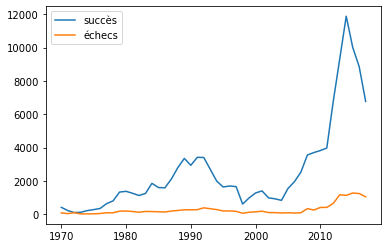

In [5]:
data_terrorism=dff #on change d'abord le nom de notre dataframe pour la suite du modèle

mr.evolution_succes_echecs(data_terrorism)



Le constat est sans appel, il y a bien plus d'actes réussis que d'actes ratés. Toutefois on remarque 2 périodes de baisse des attentats réussis, on a d'abord celle qui se trouve entre 1990 et 1997 et puis celle qui est entre 2012 et 2017. Cette dernière est d'ailleurs accompagnée d'une hausse des échecs, ce double phénomène peut être expliqué par l'augmentation  de la vigilance des gouvernements ainsi que la prolifération des politiques anti terroristes partout dans le monde.
Cette dominence prononcée des attentats réussis légitimise la nécessité de pouvoir prédire le succès des attentats afin de mettre sur place des mesures de défense. En effet des prédictions fiables encourageraient aussi les détentions préventives. Celles-ci reposeraient sur des informations recueillies par les services de renseignement (de « l’intelligence humaine »), mais aussi sur le traitement de données indiquant qu’une personne sera « coupable » d’une attaque à venir. Rappelons que la politique des « signature strikes » (frappes indentifiables) dans le cadre de la « war on terror » (guerre contre la terreur) permet déjà aux États-Unis, via les drones, d’éliminer des cibles possédant certaines caractéristiques : un homme jeune, circulant de nuit dans une zone où se trouveraient des combattants, tout en essayant de cacher son visage, etc. Celles-ci feraient d’un individu le suspect d’un futur crime, sans qu’on possède nécessairement des renseignements précis sur son identité au-delà de ce simple constat.

In [5]:
mr.success_repartition(data_terrorism)

La répartition en pourcent des 0 et 1 dans la colonne success est :
 1    90.207099
0     9.792901
Name: success, dtype: float64


On remarque ainsi que dans notre base de données data terrorism, seuls 9.79% des attentats se sont soldés par des échecs.


L'étape suivante aura un double objectif. On va d'abord choisir nos variables explicatives, en prenant le soin de rendre binaire les variables qualitatives et puis on va diviser nos données en données d'entrainement et de test.

In [6]:
    #        PRE-PROCESSING
    
    #On binarise les variables qualitatives 
    #On change les chaines de caractères en valeurs numériques                                                                     
features=pd.concat( [pd.get_dummies(data_terrorism['attacktype1_txt']),data_terrorism['crit2'],data_terrorism['iday'],
                        pd.get_dummies(data_terrorism['country_txt']),data_terrorism['crit3'],data_terrorism['imonth'],
                        pd.get_dummies(data_terrorism['weaptype1_txt']),data_terrorism['longitude'],data_terrorism['iyear'],
                        data_terrorism["nkill"],data_terrorism["nwound"],data_terrorism['crit1'],data_terrorism['latitude'],
                         data_terrorism['region']
                        ],axis=1)
    #features=Matrice des variables explicatives                    
 

    #       FEATURES EXTRACTION  

    #Division des données en ensembles d'entrainements et de tests
    #X=features, Y=target(succès)
    #On divise notre base de données en 80-20, 80% pour entrainer le modèle et 20% pour le tester
    #Xe=features_train, Ye=target_train, Xt=features_test,Yt=target_test
features_train, features_test,target_train, target_test = train_test_split(features,success, test_size = 0.2,random_state=0) 
    #On crée un dataframe qui récupère la variable success de data terrorism
success=pd.DataFrame(data_terrorism['success'])
        
    #Dummy benchmark: prévision d'un taux de reussite 
    #Prévoir 1 partout, pour pouvoir comparer ce résultat à ceux de nos modèles
comparaison=accuracy_score(target_test['success'],np.ones(len(target_test['success'])))
print(" Le taux de reussite estimé est:\n","Benchmark: ",comparaison )

 Le taux de reussite estimé est:
 Benchmark:  0.9008076822868203


On va considérer tout au long de nos modélisations le Benchmark comme un réferentiel, en effet notre objectif sera d'avoir un score plus élevé.

On va commencer par la Régression logistique.

##### **Régression Logistique**

/Users/utilisateur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/utilisateur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


La précision de la Regression Logistique est de: 0.9077306733167082
              precision    recall  f1-score   support

           0       0.73      0.11      0.19      2665
           1       0.91      1.00      0.95     24202

    accuracy                           0.91     26867
   macro avg       0.82      0.55      0.57     26867
weighted avg       0.89      0.91      0.88     26867

La mesure agrégée des performances de la RL est : AUC = 0.5534


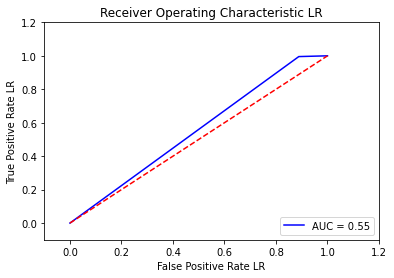

In [13]:
mr.regression_logistique(features_train, features_test,target_train, target_test) #L'opération peut prendre quelques minutes

La Régression logistique nous offre 91% de bonnes prédictions sur les succès et échecs (accuracy). Ce score est faiblement plus élevé que le Benchmark et sa performance sur le succès (en se basant sur le f1-score) est de 95% mais celle sur l'échec n'est que de 19%.

Outre sa faible capacité à bien prédire les échecs, la régression logistique a une mesure agrégée de performances AUC à hauteur de seulement 0,55. 
Nous ne pouvons cependant pas nous suffire de ces résultats, en effet on ne peut se permettre de mal prédire les échecs. Prédire un attentat comme un échec alors que tel n'est pas le cas représente un risque énorme, c'est alors minimiser la portée des attaques terroristes, ne pas mettre les moyens de sécurité et de défenses adéquats et risquer de gros dommages matériels et/ou humains.


On va alors procéder à un Random Forest dans l'espoir d'améliorer l'accuracy et l'AUC.

##### **Random Forest**

/Users/utilisateur/Documents/M1_EcoStat/Cours-M1/Language de programmation/Projet/Version finale/ModelingRegression.py:145: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest = forest.fit( features_train, target_train )


La precision du Random Forest est de:  0.9261919827297428
              precision    recall  f1-score   support

           0       0.70      0.45      0.55      2665
           1       0.94      0.98      0.96     24202

    accuracy                           0.93     26867
   macro avg       0.82      0.71      0.75     26867
weighted avg       0.92      0.93      0.92     26867

La mesure agrégée des performances du RF est : AUC = 0.7141


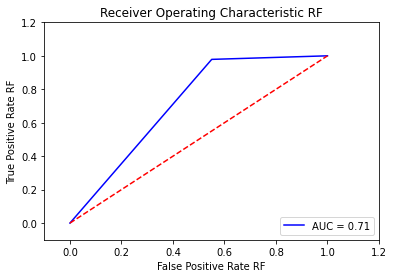

In [14]:
mr.random_forest(features_train, target_train,features_test,target_test) #L'opération peut prendre quelques minutes

Le Random Forest a de meilleures prédictions que la régression logistique. On se retrouve avec un accuracy=0.93>accuracy(regression logistique)>Benchmark. Ses coefficents f1-score aussi bien pour le succès et l'échec sont supérieurs à ceux de la régression logistique, ils sont respectivement à hauteur de 0.96(>0.95) et 0.55(>0.19). 

On notera que le gain de précision sur les succès est minime mais il est très conséquent concernant les échecs. Le point le plus significatif est sans doute l'amélioration de l'AUC qui est à environ 0.71(>0.55), on gagne ainsi 16 pts.

    
Nous sommes bien conscients des scores élevés des accuracy (0.91 et 0.93) mais les f1-score pour l'échec ainsi que les AUC sont très faibles par rapport à nos espérances. Nous pouvons expliquer ceci par la répartition initiale dans notre dataset qui est très désèquilibrée, on avait 91% de succès et 9% seulement d'échecs, ce qui pourrait probablement biaiser nos résultats. Ce désèquilibre pourrait être amélioré par des techniques d'under sampling ou d'over sampling.


## Conclusion

Ainsi, après avoir décrit nos données et appris que les régions les plus visées sont le Moyen-Orient et l'Afrique du Nord, que les acteurs principaux du terrorisme sont des individus isolés, non rattachés à un groupe terroriste connu (ou des attaques non revendiquées) ou encore que les méthodes les plus employées sont des attaques par explosifs ou armes à feu, nous avons pu mettre en évidence l'évolution du terrorisme mondial depuis 1970. Nous avons ainsi vu que le nombre d'attaques terroristes a explosé depuis 2003 (intervention des Etats-Unis en Irak) et en particulier depuis 2012, après avoir connu un déclin dans les années 1990 suite à la chute du communisme et de ce fait la fin du terrorisme d'extrême gauche. Ces 15 dernières années ont donc connu une forte hausse des attaques terroristes, caractérisées par une très forte augmentation du nombre de victimes chaque année et une moyenne de 5 victimes par attaque (contre 3 en 1980). Les groupes qui font le plus de victimes sont les gros groupes tels que les Talibans, agissant en Afghanistan, ou encore l'EI agissant dans le monde entier, et visent à déstabiliser les Etats en visant la population, sans défense, ainsi que les militaires et policiers. Les individus isolés sont ceux qui commettent le plus d'attaques, et de loin. Ainsi, faut-il concentrer la lutte anti-terroriste vers ces individus (qui semblent passer à l'acte très facilement en ce moment), ou plutôt vers les groupes connus (en éliminant les chefs par exemple, ce qui ne semble pas être très efficace) ? Si les armes à feu sont de plus en plus utilisées, car de plus en plus faciles d'accès, un contrôle accru du trafic d'armes pourrait être une idée de réponse à apporter.
Toutefois, l'analyse de nos résultats de prévison ne nous permet pas de prévoir avec une grande certitude l'échec d'un attentat, ils pourraient être meilleurs suite à des manipulations de notre features en appliquant des transformations aux variables quantitatives (logaritmique, logit etc), en augmentant nos variables explicatives ou même d'en choisir des plus pertinentes. 


